In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [9]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [10]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

In [11]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-06-28,11162.17,12445.17,10914.50,12407.33,12407.33,3.508776e+10
1,1,2019-06-29,12400.76,12400.91,11508.38,11959.37,11959.37,2.992396e+10
2,2,2019-06-30,11931.99,12178.38,10799.01,10817.16,10817.16,2.725647e+10
3,3,2019-07-01,10796.93,11206.44,10089.31,10583.13,10583.13,2.937859e+10
4,4,2019-07-02,10588.68,10912.19,9737.88,10801.68,10801.68,3.101590e+10
...,...,...,...,...,...,...,...,...
362,362,2020-06-24,9632.15,9680.37,9278.23,9313.61,9313.61,1.896172e+10
363,363,2020-06-25,9314.13,9340.16,9095.32,9264.81,9264.81,1.861605e+10
364,364,2020-06-26,9261.00,9310.52,9101.74,9162.92,9162.92,1.834147e+10
365,365,2020-06-27,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
# Data Splitting into train and test:

train_data = df[:250]
test_data = df[250:]

In [14]:
training_set = train_data.iloc[ :, 1:2].values
training_set

array([[11162.17],
       [12400.76],
       [11931.99],
       [10796.93],
       [10588.68],
       [10818.16],
       [11972.72],
       [11203.1 ],
       [10982.54],
       [11217.62],
       [11446.6 ],
       [12284.33],
       [12571.54],
       [12139.71],
       [11354.3 ],
       [11813.13],
       [11381.02],
       [10257.84],
       [10896.65],
       [ 9471.21],
       [ 9698.5 ],
       [10653.96],
       [10525.82],
       [10777.53],
       [10596.95],
       [10346.75],
       [ 9887.73],
       [ 9809.1 ],
       [ 9913.13],
       [ 9871.17],
       [ 9491.63],
       [ 9548.18],
       [ 9522.33],
       [ 9604.05],
       [10077.44],
       [10402.04],
       [10519.28],
       [10821.63],
       [10960.74],
       [11811.54],
       [11476.19],
       [11954.04],
       [11953.47],
       [11861.56],
       [11349.74],
       [11528.19],
       [11385.05],
       [10889.49],
       [10038.42],
       [10319.42],
       [10358.72],
       [10233.01],
       [1035

In [19]:
training_set.shape

(250, 1)

In [66]:
# Normalizing data values to scale between 0 and 1:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

In [67]:
training_data_scaled = sc.fit_transform(training_set)

In [68]:
X_train = []
y_train = []

for i in range(60, 250):
  X_train.append(training_data_scaled[i-60: i, 0])
  y_train.append(training_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [69]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [70]:
# Model:

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)               

In [71]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [72]:
# Early Stopping:

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [73]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[es])

Epoch 1/50
6/6 [==============================] - 0s 16ms/step - loss: 0.0784
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0312
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0288
Epoch 4/50
6/6 [==============================] - 0s 12ms/step - loss: 0.0206
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0203
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0214
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0181
Epoch 8/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0185
Epoch 9/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0177
Epoch 10/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0168
Epoch 11/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0157
Epoch 12/50
6/6 [==============================] - 0s 11ms/step - loss: 0.0155
Epoch 13/50
6/6 [==============================] - 0s 13ms/st

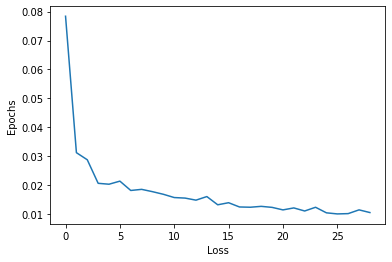

In [74]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.show()

In [75]:
# Preparing test data to make peredictions:

real_price = test_data.iloc[:, 1:2].values

In [76]:
test_data.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
dataset = pd.concat([train_data['Open'], test_data['Open']])
inputs = dataset[len(dataset) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 117):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

In [78]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [79]:
predicted_price = model.predict(X_test)

In [80]:
predicted_price = sc.inverse_transform(predicted_price)

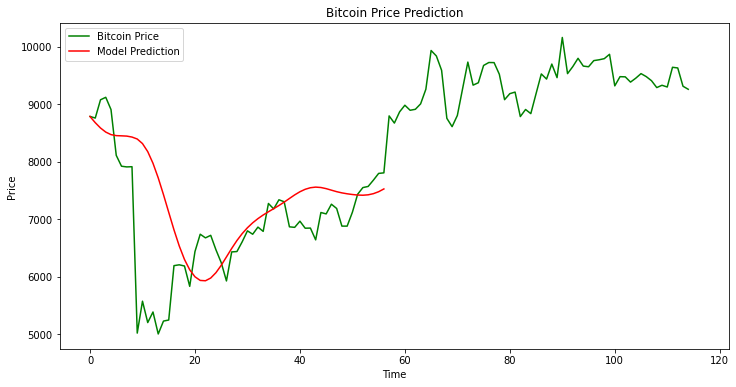

In [81]:
# Plotting Predictions:

plt.figure(figsize=(12, 6))

plt.plot(real_stock_price, color='green', label='Bitcoin Price')
plt.plot(predicted_price, color='red', label='Model Prediction')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()